In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the csv file:
df = pd.read_csv("Netflix.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [ ]:
#Checking the null values:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,1969
cast,570
country,476
date_added,11
release_year,0
rating,10
duration,0


In [ ]:
#Cleaning data:
data= df.dropna(subset=["type","release_year","rating","country","duration"])
type_counts = df["type"].value_counts()


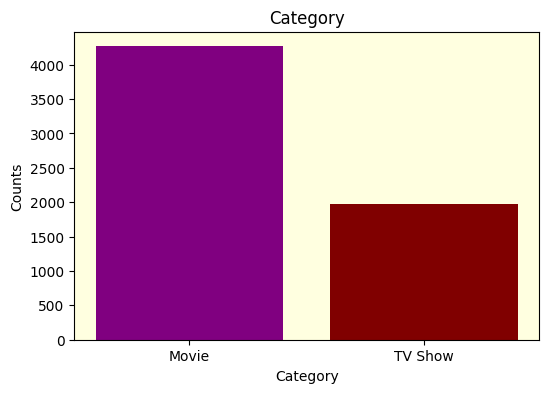

In [ ]:
#Visually representing the Category:

plt.figure(figsize=(6,4), facecolor = "white")
plt.gca().set_facecolor("lightyellow")              #for background color
plt.bar(type_counts.index, type_counts.values, color =["purple","maroon"])

#Labeling X-axis any Y-axis:
plt.xlabel("Category")
plt.ylabel("Counts")

plt.title("Category")
plt.savefig("Movies vs Tv Shows")
plt.show()

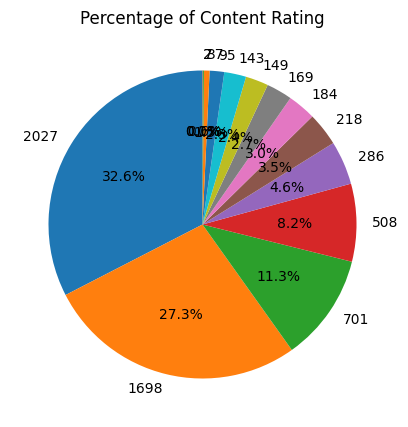

In [ ]:
#Visually representing the Percentage count of Content Rating:

rating_counts = df["rating"].value_counts()
plt.figure(figsize= (8,5), facecolor=("white"))
plt.pie(rating_counts,labels =rating_counts, autopct= "%1.1f%%", startangle=90)
plt.title("Percentage of Content Rating")
plt.show()


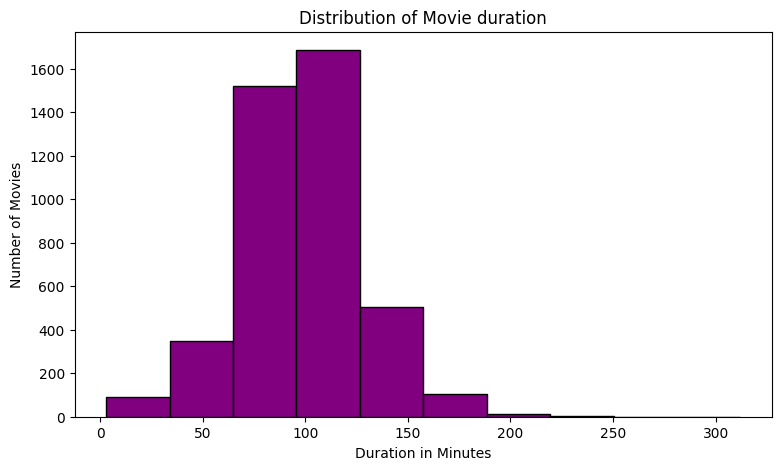

In [ ]:
#Visually representing the distribution of movie duration:

movie_df = df[df["type"] == "Movie"].copy()
movie_df["duration_int"] = movie_df["duration"].str.replace("min"," ").astype(int)

plt.figure(figsize=(9,5) , facecolor= ("white"))
plt.hist(movie_df["duration_int"], bins = 10 , color ="purple", edgecolor = "black")

#Labeling X-axis any Y-axis:
plt.xlabel("Duration in Minutes")
plt.ylabel("Number of Movies")

plt.title("Distribution of Movie duration")
plt.show()


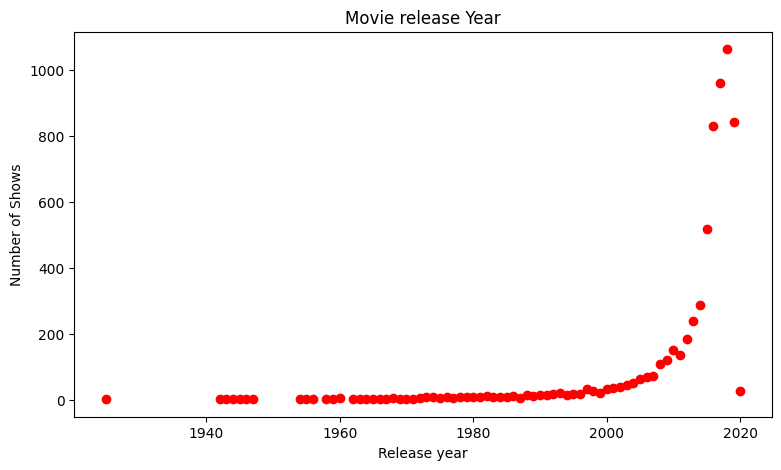

In [ ]:
#Visually representing the distribution of movie duration:

release_counts = df["release_year"].value_counts().sort_index()
plt.figure(figsize=(9,5), facecolor= ("white"))
plt.scatter(release_counts.index , release_counts.values, color = "red")

#Labeling X-axis any Y-axis:
plt.xlabel("Release year")
plt.ylabel("Number of Shows")

plt.title("Movie release Year")
plt.show()


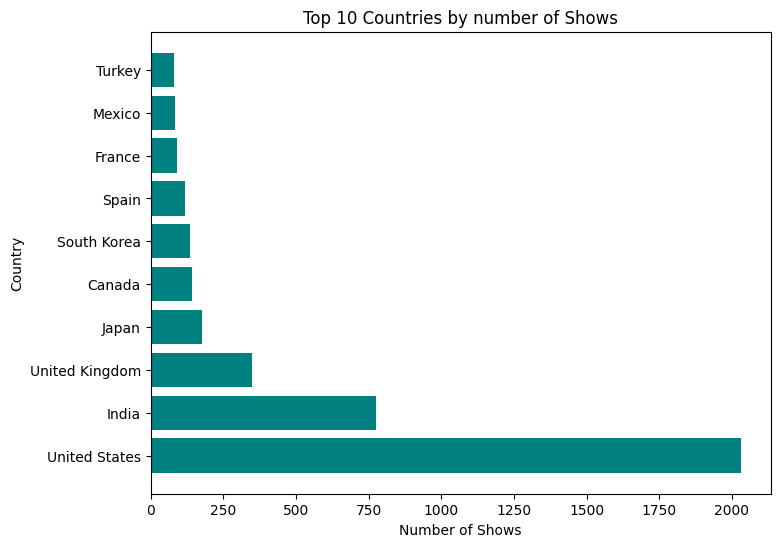

In [ ]:
#Visually representing the Top 10 Countries by number of Shows:

country_counts = df["country"].value_counts().head(10)

plt.figure(figsize= (8,6))
plt.barh(country_counts.index, country_counts.values , color ="teal")

#Labeling X-axis any Y-axis:
plt.xlabel("Number of Shows")
plt.ylabel("Country")

plt.title("Top 10 Countries by number of Shows")
plt.show()


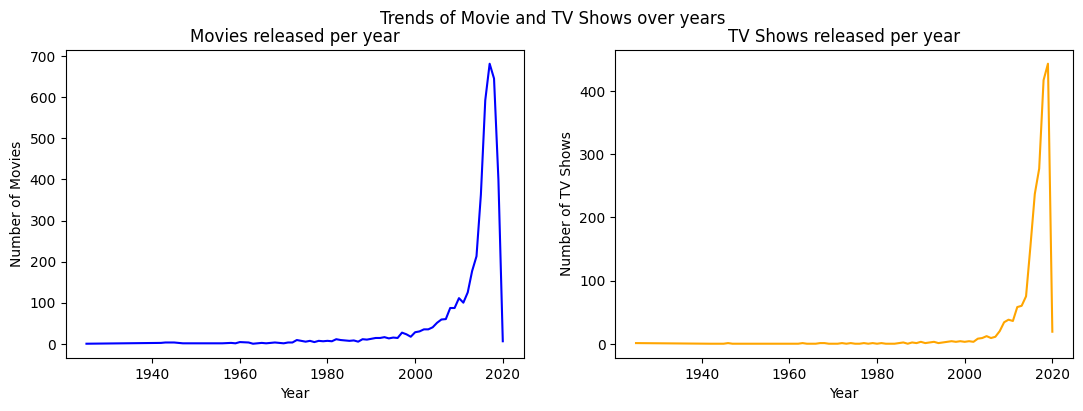

In [ ]:
#Visually representing the Trends of Movie and TV Shows over years:

content_over_year = df.groupby(["release_year", "type"]).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2, figsize = (13,4))

#1st Subplot: Movies
ax[0].plot(content_over_year.index, content_over_year["Movie"], color ="blue")
ax[0].set_title("Movies released per year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Movies")

#2nd Subplot: TV Shows
ax[1].plot(content_over_year.index, content_over_year["TV Show"], color ="orange")
ax[1].set_title("TV Shows released per year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of TV Shows")

fig.suptitle("Trends of Movie and TV Shows over years")
plt.show()


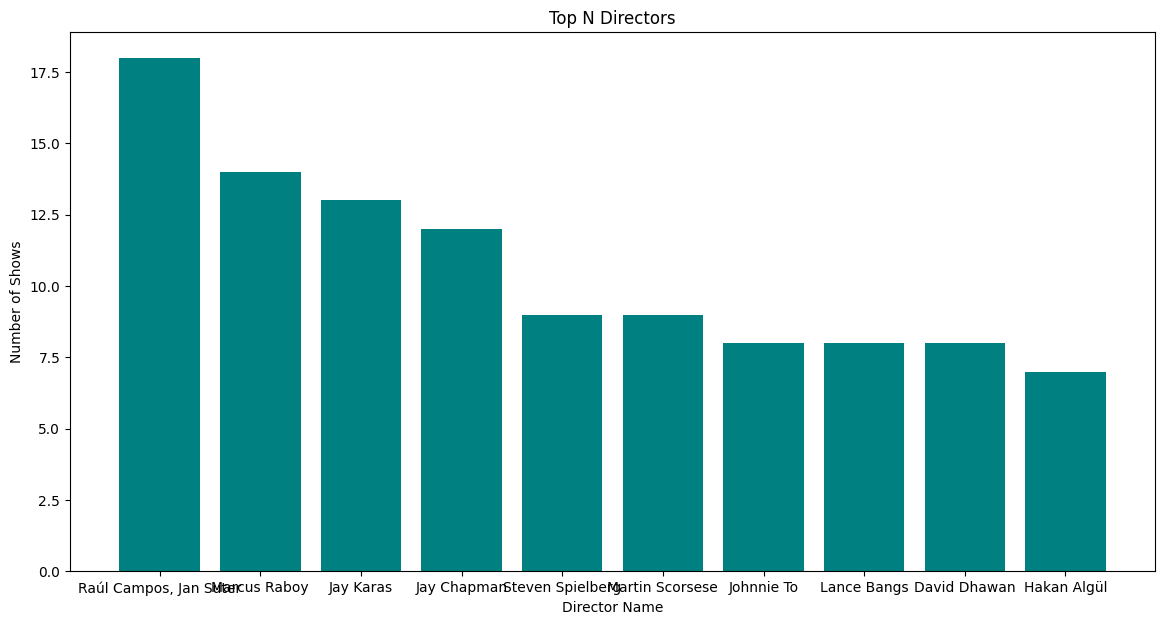

In [9]:
#Visually representing the Top 10 directors:

director_df = df.dropna(subset = ["director"]).copy()
director_counts = director_df["director"].value_counts()
top_n_director = 10
top_director = director_counts.head(top_n_director)

plt.figure(figsize=(14,7))
plt.bar(top_director.index, top_director.values, color = "teal")

#Labeling X-axis any Y-axis:
plt.xlabel("Director Name")
plt.ylabel("Number of Shows")

plt.title("Top N Directors")
plt.show()
